In [2]:
from ML.EFPs.data_loaders import load_data_top_tagging
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import joblib
import utilities.utilities as utilities

#### Loading the Dataset

In [3]:
root_data_folder = "../../../Data"
X_train, y_train = load_data_top_tagging(
    quark_data_path=f"{root_data_folder}/Trainning/q_jets_efps_d5_primed.npy", 
    gluon_data_path=f"{root_data_folder}/Trainning/g_jets_efps_d5_primed.npy",
    top_data_path=f"{root_data_folder}/Trainning/t_jets_efps_d5_primed.npy"
)
X_val, y_val = load_data_top_tagging(
    quark_data_path=f"{root_data_folder}/Validation/q_jets_efps_d5_primed.npy", 
    gluon_data_path=f"{root_data_folder}/Validation/g_jets_efps_d5_primed.npy",
    top_data_path=f"{root_data_folder}/Validation/t_jets_efps_d5_primed.npy"
)

#### Trainning the DT

In [8]:
# First we perform a grid search to look for the best hiperparamers for the model
model = DecisionTreeClassifier(criterion="entropy")

# first search - Best result: max_depth=10 min_samples_split=200
# first search - Best result: max_depth=10 min_samples_split=250
params_for_search = {
    # 1. [5, 10, 20, 30],
    # 2. [8, 9, 10, 11, 12]
    # 3. [10]
    "max_depth": [10],
    # 1. [100, 150, 200],
    # 2. [200, 250]
    # 3. [250, 275, 300]
    "min_samples_split": [250, 275, 300]
}

grid_search = GridSearchCV(model, params_for_search, return_train_score=True, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END max_depth=10, min_samples_split=250;, score=(train=0.887, test=0.882) total time=   7.8s
[CV 2/5] END max_depth=10, min_samples_split=250;, score=(train=0.887, test=0.880) total time=   7.8s
[CV 3/5] END max_depth=10, min_samples_split=250;, score=(train=0.887, test=0.880) total time=   7.8s
[CV 4/5] END max_depth=10, min_samples_split=250;, score=(train=0.887, test=0.883) total time=   7.8s
[CV 5/5] END max_depth=10, min_samples_split=250;, score=(train=0.887, test=0.883) total time=   7.8s
[CV 1/5] END max_depth=10, min_samples_split=275;, score=(train=0.887, test=0.882) total time=   7.8s
[CV 2/5] END max_depth=10, min_samples_split=275;, score=(train=0.887, test=0.880) total time=   7.8s
[CV 3/5] END max_depth=10, min_samples_split=275;, score=(train=0.887, test=0.880) total time=   7.8s
[CV 4/5] END max_depth=10, min_samples_split=275;, score=(train=0.887, test=0.883) total time=   7.8s
[CV 5/5] END max_depth

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [10],
                         'min_samples_split': [250, 275, 300]},
             return_train_score=True, verbose=3)

In [9]:
pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score']].sort_values(by=['mean_test_score'], ascending=False)

,params,mean_test_score
2,"{'max_depth': 10, 'min_samples_split': 300}",0.881662
1,"{'max_depth': 10, 'min_samples_split': 275}",0.881517
0,"{'max_depth': 10, 'min_samples_split': 250}",0.881434


###### Trainning the best tree (not needed, but good to train over the entire dataset and check it in the validation set)

In [10]:
# trainning a tree with max_depth equal to 9 and min_samples_split equal to 250
tree = DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_split=300)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=300)

In [11]:
tree.feature_importances_

array([2.47643165e-02, 8.37911198e-01, 5.10424833e-03, 1.03379448e-02,
       5.48807433e-03, 5.16139100e-03, 1.16373835e-03, 7.81561906e-04,
       3.26149140e-04, 5.80214962e-04, 1.05630393e-04, 2.42634911e-04,
       8.30865678e-02, 1.63025946e-03, 8.82198002e-04, 5.29708377e-03,
       1.32153038e-03, 1.93631511e-04, 5.17278910e-04, 5.14277386e-04,
       1.13716600e-03, 4.05241849e-04, 1.47216450e-04, 4.29368716e-05,
       8.27615203e-05, 1.29966175e-04, 4.42616304e-05, 3.22612022e-04,
       5.68642793e-04, 3.91636681e-04, 3.23238492e-05, 6.77734644e-05,
       4.65805514e-04, 1.22199923e-04, 2.88346731e-03, 4.19741318e-03,
       1.54442591e-04, 0.00000000e+00, 6.87848528e-05, 0.00000000e+00,
       0.00000000e+00, 1.18811310e-04, 0.00000000e+00, 1.13748351e-04,
       6.74881835e-05, 8.06355403e-04, 0.00000000e+00, 4.17557048e-04,
       1.15688933e-03, 6.23719236e-04, 0.00000000e+00, 2.08480854e-05,
       0.00000000e+00, 0.00000000e+00])

#### Some quick checks

In [12]:
y_val_predict = tree.predict(X_val)
utilities.display_metrics(y_val, y_val_predict)

Recall: 0.9101
Precision: 0.8640
Confusion Matrix:
[[18932  3250]
 [ 2040 20648]]


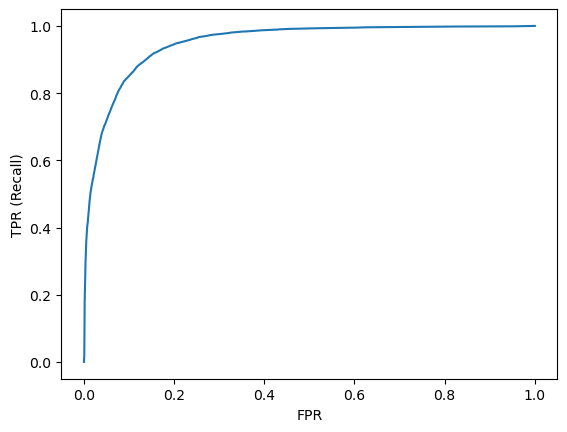

AUC: 0.9501


In [13]:
# roc curve on the validation set
y_score = tree.predict_proba(X_val)
utilities.display_roc_curve(y_val, y_score[:, 1])

#### Saving the Model

In [14]:
with open("Top_Tagging_DT.joblib", "wb") as fo:
    joblib.dump(tree, fo)